# 1. Anomaly detection algorithms

Los outliers en el problema de zonificación son aquellos clientes alejados del grupo grande de ubicaciones, usualmente se encuentran en zonas alejadas a la ciudad → poblaciones. Estos clientes se remueven de la zonificación pues no siguen la lógica de este proceso.

<img src="https://scikit-learn.org/0.20/_images/sphx_glr_plot_anomaly_comparison_001.png" width="400" height="400" />

Para nuestro caso de estudio los métodos One-Class SVM, Isolation Forest y Local Outlier Factor son factibles. Robust covariance no pues obliga a uqe los datos se distribuya como una elipse y eso depende de la ciudad.

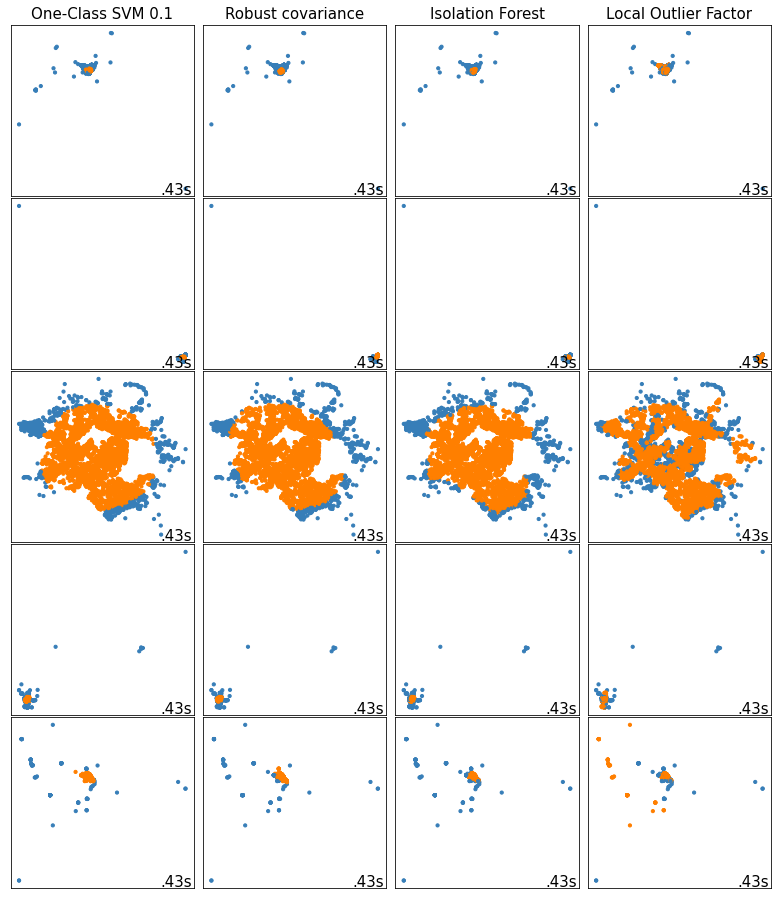

In [41]:
import time

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# DataSets
files = ['fontibon.csv', 'quito.csv', 'tlalnepantla.csv', 'cali.csv', 'bucaramanga.csv']
datasets = []

for i in files:
    df = pd.read_csv(i)
    df.dropna()
    df = df.to_dict(orient = 'index')
    datasets.append( np.array([ [df[j]['lng'], df[j]['lat']] for j in df ]) )

# Detection algorithmn with different gamma value
anomaly_algorithms = [
    ("One-Class SVM 0.1", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",gamma=0.1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction))
]

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, X in enumerate(datasets):
    for name, algorithm in anomaly_algorithms:
        
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        
        if i_dataset == 0:
            plt.title(name, size=15)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)
        
        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

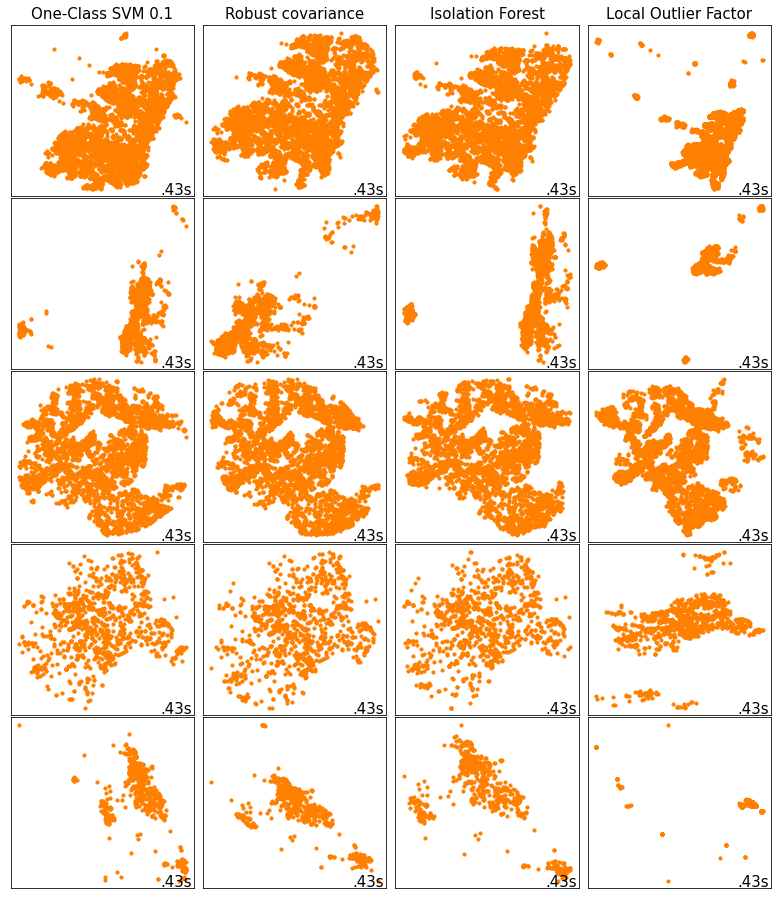

In [42]:
# Not plotting outliers

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, X in enumerate(datasets):
    for name, algorithm in anomaly_algorithms:
        
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        
        if i_dataset == 0:
            plt.title(name, size=15)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)
        
        newX = []
        for idx, k in enumerate(y_pred):
            if k == 1:
                newX.append(X[idx])
                
        newX = np.array(newX)
        
        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(newX[:, 0], newX[:, 1], s=10, color=colors[1])
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()